## 주어진 machine_data.csv에서 특징을 선택 후 교차검증을 해서 데이터의 값이 90% 이상이 나오도록 하는 문제이다.

1. 변수 설정
   * 변수는 prp
   * 사용할 모델링 LinearRegression
2. 교차 검증을 통해서 성능을 평가
3. 이후 데이터의 값이 90% 이상이 나오도록 하기


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
## csv로 저장되어 있는 값을 pandas의 DataFrame 값으로 변환 하기
machine = pd.read_csv("machine_data.csv")
machine
## 컬럼이 무엇이 있는지 확인
machine.columns

Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP'],
      dtype='object')

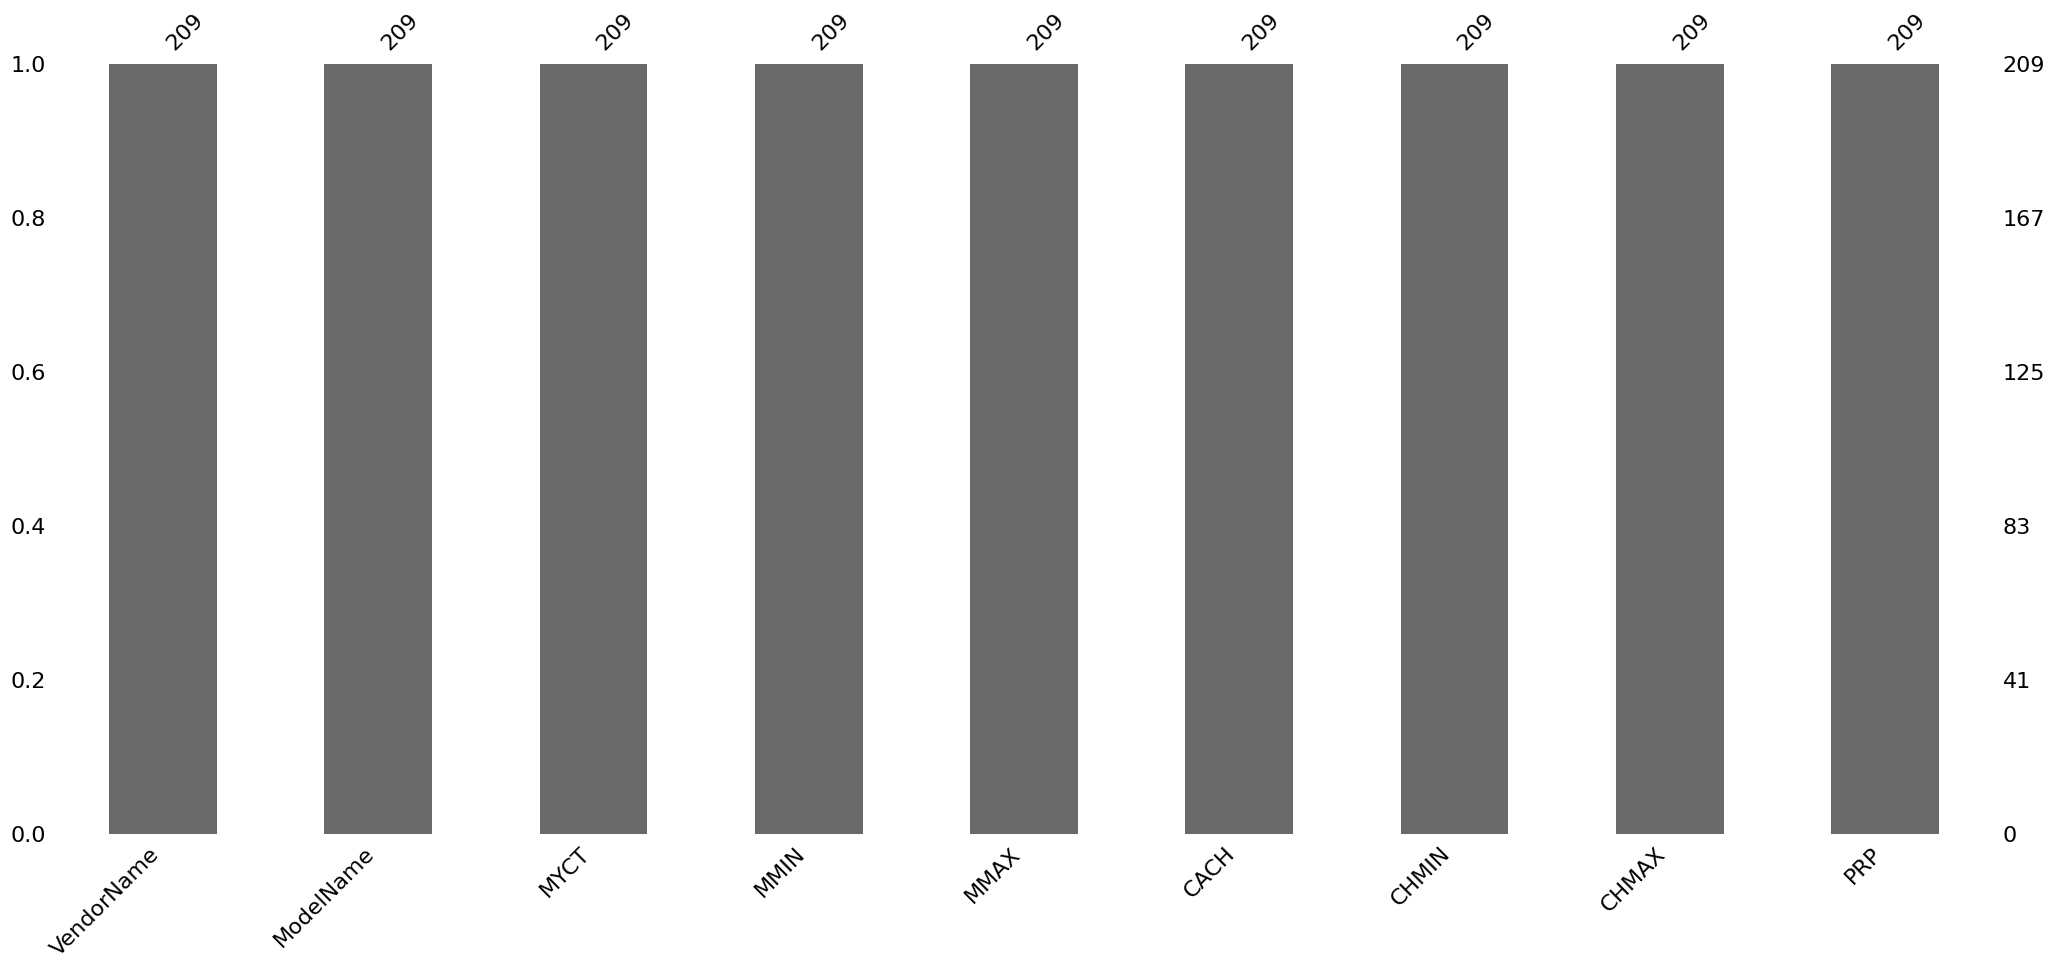

In [3]:
import missingno as msn
# 결측값의 개수를 막대 그래프로 시각화 한다.
msn.bar(machine)
# 정확성을 위해서 결측치의 값을 제거해 준다
# 결측치가 하나도 없는 것을 알 수 있다.
machine.dropna(inplace = True)

In [4]:
#결측치가 없는 것을 확인했기 때문에 PRP와의 상관 관계를 계산해서 변수를 선택해줘야한다.
# pandas 라이브러리에 포함된 DataFrame의 메서드인 corr() 메서드를 사용해야 한다.
# 또한 상관도를 구할 때 모든 변수들의 값은 수치화 되어야 한다.
# 모든 변수를 수치화 한다.
dums = pd.get_dummies(machine, dtype=float)
# PRP와의 상관계수 계산
prp_resulte = dums.corr()['PRP']
# 상관계수 값을 절대값으로 변환
# 변환의 이유는 간단하다. corr() 메서드가 -1~1의 값을 가져오기 때문이다.
prp_resulte= np.abs(prp_resulte)
# 상관계수를 내림차순으로 정렬
prp_resulte.sort_values(ascending=False)

PRP                        1.000000
MMAX                       0.863004
MMIN                       0.794931
CACH                       0.662641
CHMIN                      0.608903
                             ...   
ModelName_v8655            0.002430
ModelName_as/6650          0.002324
ModelName_50-850-ii        0.001460
ModelName_as/7000-n        0.000269
ModelName_cyber:170/835    0.000163
Name: PRP, Length: 246, dtype: float64

In [5]:
# 내림차순으로 선택 후 상관 관계가 높은 features 선택
num_features = prp_resulte.sort_values(ascending=False).index[1:6].tolist()

In [6]:
# X는 2차원 표이며 독립 변수이다.
X = dums[num_features]
# y는 1차원 시리즈이며 종속 변수이다. 
y = dums['PRP']
# 데이터를 훈련용 데이터와 테스트 데이터로 분류한다
# 다음은 20%는 테스터 데이터로 80%훈련용 데이터로 사용한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.122, random_state=42)
# 스케일링
# 굳이 사용하지 않아도 되지만 최적화에 용이하기 떄문에 사용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# 예측
y_pred = model.predict(X_test_scaled)
# 성능 평가 결과
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Squared Error: 7664.441636197283
Mean Absolute Error: 50.50870716346489
R² Score: 0.8920414893966989


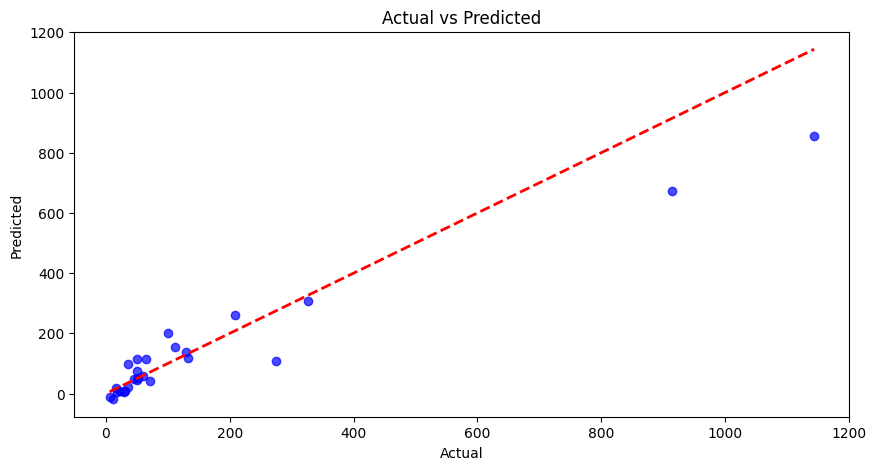

In [7]:
# 시각화: 실제 값 vs. 예측 값
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()